# Flight Fare Prediction

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Importing Dataset

Since data is in form of excel file we have to use pandas read_excel to load the data

In [2]:
df_train=pd.read_excel("C:\\Users\\user\\Desktop\\Flight_Train.xlsx")

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train.shape

(10683, 11)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df_train.dropna(inplace=True)

In [8]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df_train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

### EDA

1.From description we can easily see that Column" Date_of_Journey" is in categorical form , Therefore we have to convert this datatype into timestamp so we're albe to use this column properly for our prediction.

2.For this we require pandas "to_datetime" to convert object datatype into datetime datatype.

3."dt.day" will extract day of the date and "dt.month" will extract month of the date.

In [10]:
df_train["journey_day"]=pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.day

In [11]:
df_train["jouney_month"]=pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.month

In [12]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,jouney_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
# Since we've converted Date_of_Journey into datetime so we can now remove it as it is of no use 
df_train.drop(["Date_of_Journey"],axis=1,inplace=True)

In [14]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,jouney_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
# Departure time is when a plane leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df_train["Dep_hour"]=pd.to_datetime(df_train.Dep_Time).dt.hour

# Extracting Minutes
df_train["Dep_Minutes"]=pd.to_datetime(df_train["Dep_Time"]).dt.minute

# Drop Dep_Time as it is of no use now
df_train.drop(["Dep_Time"],axis=1,inplace=True)

In [16]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,jouney_month,Dep_hour,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [17]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour

# Extracting Minutes
df_train["Arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [18]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,jouney_month,Dep_hour,Dep_Minutes,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [19]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [20]:
# Adding duration_hours and duration_mins list to df_train dataframe

df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

In [21]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,jouney_month,Dep_hour,Dep_Minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [22]:
df_train.drop(["Duration"],axis=1,inplace=True)

In [23]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,jouney_month,Dep_hour,Dep_Minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Handling Categorical Data

1. Nominal data---> Data are not in any order ---->"OneHotEncoder" is used in this case.
2. Ordinal data---> Data are in order---->"LabelEncoder" is used in this case.

In [24]:
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [25]:
df_train=df_train.loc[df_train["Airline"]!="Jet Airways"]

In [26]:
df_train["Airline"].value_counts()

IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

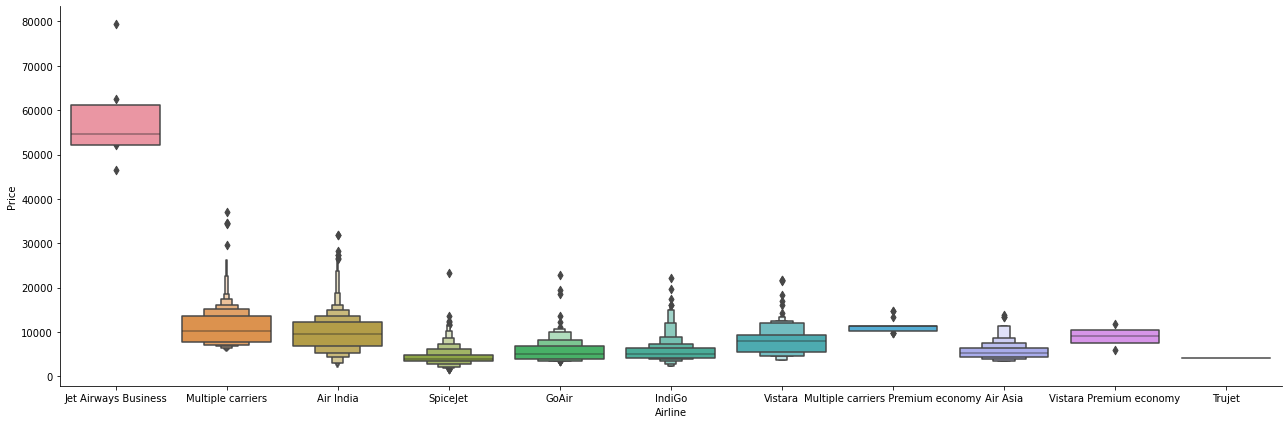

In [27]:
# Airline vs Price

sns.catplot(y="Price",x="Airline",data=df_train.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

# From the below graph we can see that Jet Airways Business have the highest price.
#Apart from the First Airline almost all are having same price.

In [28]:
# As Airline is Nominal Categorical data we will perform One Hot Encoding
Airline=df_train[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0


In [29]:
df_train["Source"].value_counts()

Delhi       2950
Kolkata     1615
Banglore    1409
Mumbai       478
Chennai      381
Name: Source, dtype: int64

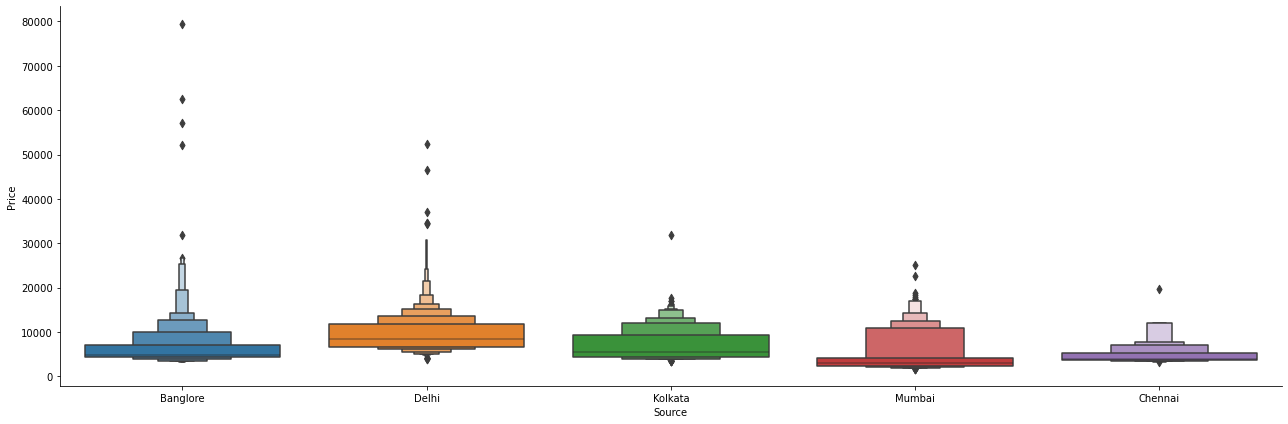

In [30]:
# Price vs Source
sns.catplot(y="Price",x="Source",data=df_train.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [31]:
# Source is also a nominal data so we use One Hot Encoding

Source=df_train[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0


In [32]:
df_train["Destination"].value_counts()

Cochin       2950
Banglore     1615
Delhi         895
New Delhi     514
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64

In [33]:
Destination=df_train[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0


In [34]:
df_train["Additional_Info"].value_counts()

No info                         6394
No check-in baggage included     320
In-flight meal not included       96
1 Long layover                     7
Change airports                    7
No Info                            3
Business class                     3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [35]:
df_train.shape

(6833, 15)

In [36]:
# Additional_Info contains More than 80% no_info.
# Route and Total_Stops are related to each other so we drop any of them for better training of our model.

df_train.drop(["Additional_Info","Route"],axis=1,inplace=True)


In [37]:
df_train["Total_Stops"].value_counts()

1 stop      3090
non-stop    2868
2 stops      829
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [38]:
# As Total_Stops is ordinal data so we have to perform LabelEncoder
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df_train["Total_Stops"]=lab.fit_transform(df_train["Total_Stops"])
df_train["Total_Stops"]


0        4
1        1
3        0
4        0
5        4
        ..
10677    4
10678    4
10679    4
10681    4
10682    1
Name: Total_Stops, Length: 6833, dtype: int32

In [39]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,jouney_month,Dep_hour,Dep_Minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,4,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,1,7662,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,0,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,0,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,4,3873,24,6,9,0,11,25,2,25


In [40]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

df_train = pd.concat([df_train, Airline, Source, Destination], axis = 1)

In [41]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,jouney_month,Dep_hour,Dep_Minutes,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,4,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,1,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,0,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,0,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1
5,SpiceJet,Kolkata,Banglore,4,3873,24,6,9,0,11,...,0,0,0,1,0,0,0,0,0,0


In [42]:
df_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [43]:
df_train.head()

,Total_Stops,Price,journey_day,jouney_month,Dep_hour,Dep_Minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,1,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
3,0,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
5,4,3873,24,6,9,0,11,25,2,25,...,0,0,0,1,0,0,0,0,0,0


In [44]:
df_train.shape

(6833, 29)

### Test set

In [45]:
test_data=pd.read_excel("C:\\Users\\user\\Desktop\\Flight_Test.xlsx")

In [46]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [47]:
test_data.shape

(2671, 10)

In [48]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
test_data=test_data.loc[test_data["Airline"]!="Jet Airways"]
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [49]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0
6,1,12,3,7,30,22,35,15,5,1,...,0,0,0,0,0,0,0,0,0,1
7,1,1,5,15,15,20,30,5,15,0,...,0,0,0,1,0,0,0,0,0,0


### Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. Univariate Selection
2. Feature Importance.
3. Heatmap

In [50]:
X=df_train.loc[:,df_train.columns!="Price"]
X.head()

,Total_Stops,journey_day,jouney_month,Dep_hour,Dep_Minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
3,0,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1
5,4,24,6,9,0,11,25,2,25,0,...,0,0,0,1,0,0,0,0,0,0


In [51]:
y=df_train.loc[:,"Price"]
y.head()

0     3897
1     7662
3     6218
4    13302
5     3873
Name: Price, dtype: int64

### Finds correlation between Independent and dependent attributes

<AxesSubplot:>

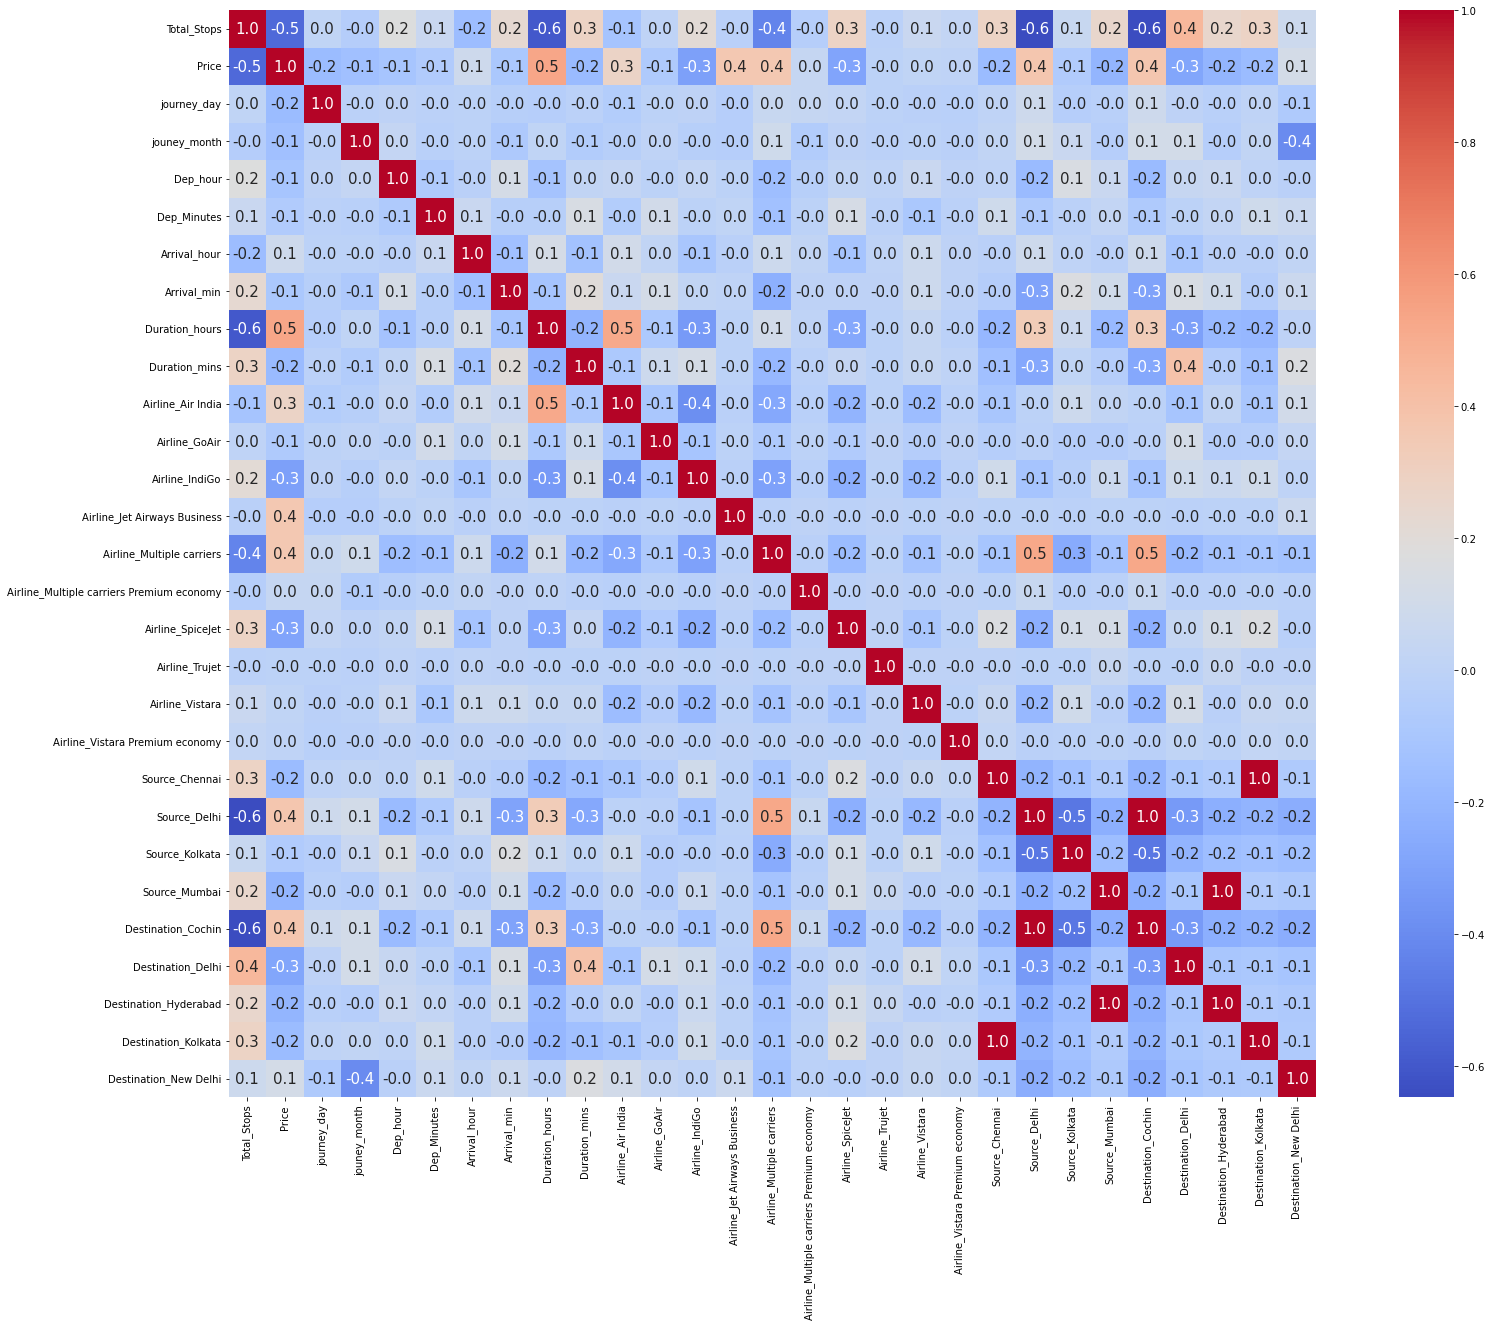

In [52]:
corr=df_train.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr,square=True,fmt='.1f', annot=True, annot_kws={'size':15},cmap="coolwarm")

In [53]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [54]:
print(selection.feature_importances_)

[3.31409842e-01 1.04690684e-01 6.35949503e-02 3.05262814e-02
 3.00495950e-02 2.93740986e-02 2.40284234e-02 6.42705040e-02
 2.24044588e-02 1.62126075e-02 3.18314331e-03 4.38412435e-02
 1.23420349e-01 2.90398665e-02 1.69207343e-03 6.58657643e-03
 2.84827341e-04 9.20826627e-03 1.65408026e-04 9.29667103e-04
 1.32489291e-02 5.04481144e-03 3.34159393e-03 1.73569088e-02
 8.70682243e-04 3.24651570e-03 1.11434587e-03 2.08633465e-02]


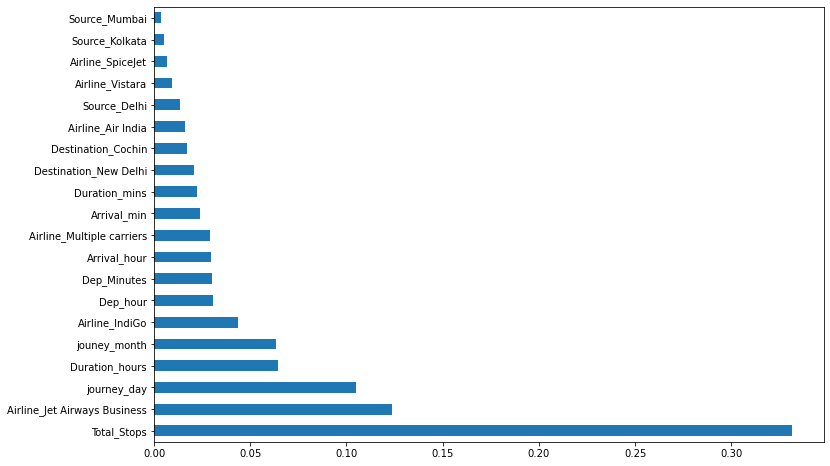

In [55]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Fitting model using Random Forest

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [58]:
y_pred=rf_reg.predict(X_test)

In [59]:
rf_reg.score(X_train,y_train)

0.9751613241167472

In [60]:
rf_reg.score(X_test,y_test)

0.8339484691039173

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


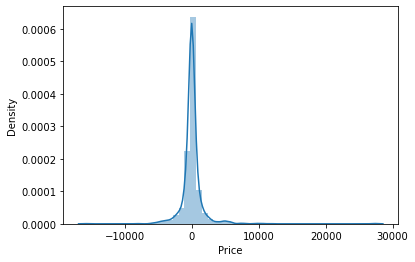

In [61]:
sns.distplot(y_test-y_pred)
plt.show()

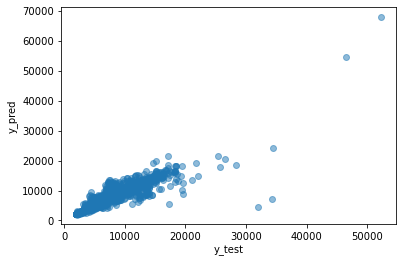

In [62]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [63]:
from sklearn.metrics import r2_score
r=r2_score(y_test,y_pred)
print('R^2:',r)

R^2: 0.8339484691039173


In [64]:
print('Adjusted R^2:',1 - (1-r)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R^2: 0.831647903609068


In [65]:
from sklearn.metrics import mean_squared_error
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 1667.6462642431982


In [66]:
from sklearn.metrics import mean_squared_error
print('MSE:',mean_squared_error(y_test,y_pred))

MSE: 2781044.062644295


In [67]:
from sklearn.metrics import mean_absolute_error
print('MAE:',mean_absolute_error(y_test,y_pred))

MAE: 771.0323794463801


### Hyperparameter Tuning

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [70]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [72]:
rf_random = RandomizedSearchCV(estimator=rf_reg,param_distributions=random_grid,n_iter=10,cv=5,scoring='neg_mean_squared_error',verbose=2,random_state=42,n_jobs=1)


In [73]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [74]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [75]:
prediction=rf_random.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


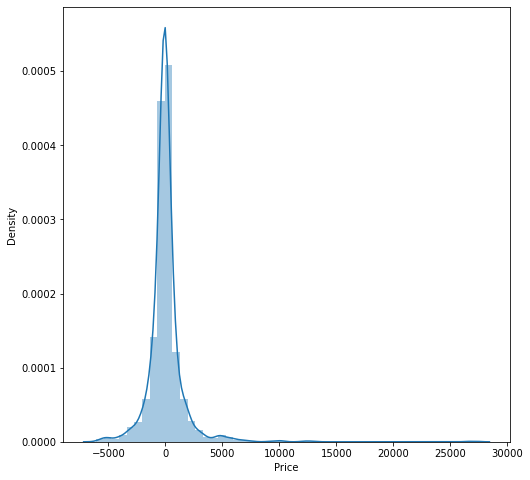

In [76]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

In [77]:
from sklearn.metrics import mean_absolute_error
print('MAE:',mean_absolute_error(y_test,prediction))

MAE: 836.7377698691971


In [79]:
from sklearn.metrics import mean_squared_error
print('MSE:',mean_squared_error(y_test,prediction))

MSE: 2864706.173110182


In [80]:
from sklearn.metrics import mean_squared_error
print('RMSE:',np.sqrt(mean_squared_error(y_test,prediction)))

RMSE: 1692.5442898518731


## Save the model to reuse it again

In [81]:
import pickle

In [83]:
with open('model_pickle','wb') as f:
    pickle.dump(rf_random,f)

In [84]:
with open('model_pickle','rb') as f:
    model=pickle.load(f)

In [85]:
y_prediction=model.predict(X_test)

In [86]:
from sklearn.metrics import r2_score
r=r2_score(y_test,y_prediction)
print('R^2:',r)

R^2: 0.8289531431731053
